In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
#unxipping the file and loading the content of the file to file_content
import gzip
path = '/content/drive/MyDrive/email-Eu-core.txt.gz'
with gzip.open(path, 'rb') as f:
    file_content = f.read()
file_content

b'0 1\n2 3\n2 4\n5 6\n5 7\n8 9\n10 11\n12 13\n12 14\n15 16\n17 18\n12 19\n20 21\n20 22\n23 24\n23 25\n23 26\n23 27\n23 28\n23 29\n23 30\n23 31\n23 32\n23 33\n23 34\n23 35\n23 36\n23 37\n23 38\n23 39\n23 40\n41 42\n43 44\n45 46\n47 48\n49 50\n41 51\n52 53\n54 55\n54 56\n54 57\n54 58\n54 59\n60 61\n54 54\n62 63\n64 65\n62 4\n66 67\n68 69\n42 41\n70 71\n72 21\n71 70\n73 74\n75 76\n75 48\n77 78\n77 79\n80 81\n80 68\n19 62\n82 83\n22 21\n82 84\n21 72\n41 85\n41 86\n41 87\n82 86\n88 89\n90 91\n92 20\n41 93\n41 94\n41 95\n89 96\n89 88\n97 98\n97 99\n97 100\n97 101\n97 102\n103 104\n51 41\n82 105\n90 106\n62 107\n108 109\n108 66\n108 110\n108 111\n108 112\n113 114\n115 116\n117 118\n76 119\n17 120\n82 121\n122 123\n14 12\n124 125\n13 126\n127 128\n127 129\n127 130\n131 132\n40 26\n40 29\n18 133\n56 55\n56 54\n56 59\n134 6\n115 62\n135 136\n137 138\n137 137\n22 20\n139 140\n141 142\n143 143\n143 51\n143 133\n144 145\n146 147\n83 82\n148 149\n150 103\n150 150\n49 84\n151 28\n152 153\n153 152\n15

In [35]:
#importing necessary libraries
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [37]:
type(file_content)

bytes

In [38]:
#converting byte to string
str = file_content.decode()
str

'0 1\n2 3\n2 4\n5 6\n5 7\n8 9\n10 11\n12 13\n12 14\n15 16\n17 18\n12 19\n20 21\n20 22\n23 24\n23 25\n23 26\n23 27\n23 28\n23 29\n23 30\n23 31\n23 32\n23 33\n23 34\n23 35\n23 36\n23 37\n23 38\n23 39\n23 40\n41 42\n43 44\n45 46\n47 48\n49 50\n41 51\n52 53\n54 55\n54 56\n54 57\n54 58\n54 59\n60 61\n54 54\n62 63\n64 65\n62 4\n66 67\n68 69\n42 41\n70 71\n72 21\n71 70\n73 74\n75 76\n75 48\n77 78\n77 79\n80 81\n80 68\n19 62\n82 83\n22 21\n82 84\n21 72\n41 85\n41 86\n41 87\n82 86\n88 89\n90 91\n92 20\n41 93\n41 94\n41 95\n89 96\n89 88\n97 98\n97 99\n97 100\n97 101\n97 102\n103 104\n51 41\n82 105\n90 106\n62 107\n108 109\n108 66\n108 110\n108 111\n108 112\n113 114\n115 116\n117 118\n76 119\n17 120\n82 121\n122 123\n14 12\n124 125\n13 126\n127 128\n127 129\n127 130\n131 132\n40 26\n40 29\n18 133\n56 55\n56 54\n56 59\n134 6\n115 62\n135 136\n137 138\n137 137\n22 20\n139 140\n141 142\n143 143\n143 51\n143 133\n144 145\n146 147\n83 82\n148 149\n150 103\n150 150\n49 84\n151 28\n152 153\n153 152\n154

In [17]:
#removing the unwanted data from the string
#str = str.replace('# Directed graph (each unordered pair of nodes is saved once): soc-Epinions1.txt \r\n# Directed Epinions social network\r\n# Nodes: 75879 Edges: 508837\r\n# FromNodeId\tToNodeId\r','')

In [39]:
#replacing the whitespace chars with space
str = str.replace("\n", " ")
str

'0 1 2 3 2 4 5 6 5 7 8 9 10 11 12 13 12 14 15 16 17 18 12 19 20 21 20 22 23 24 23 25 23 26 23 27 23 28 23 29 23 30 23 31 23 32 23 33 23 34 23 35 23 36 23 37 23 38 23 39 23 40 41 42 43 44 45 46 47 48 49 50 41 51 52 53 54 55 54 56 54 57 54 58 54 59 60 61 54 54 62 63 64 65 62 4 66 67 68 69 42 41 70 71 72 21 71 70 73 74 75 76 75 48 77 78 77 79 80 81 80 68 19 62 82 83 22 21 82 84 21 72 41 85 41 86 41 87 82 86 88 89 90 91 92 20 41 93 41 94 41 95 89 96 89 88 97 98 97 99 97 100 97 101 97 102 103 104 51 41 82 105 90 106 62 107 108 109 108 66 108 110 108 111 108 112 113 114 115 116 117 118 76 119 17 120 82 121 122 123 14 12 124 125 13 126 127 128 127 129 127 130 131 132 40 26 40 29 18 133 56 55 56 54 56 59 134 6 115 62 135 136 137 138 137 137 22 20 139 140 141 142 143 143 143 51 143 133 144 145 146 147 83 82 148 149 150 103 150 150 49 84 151 28 152 153 153 152 154 155 156 157 139 15 158 159 4 2 4 3 133 18 160 161 84 162 84 50 84 49 84 71 72 163 164 139 165 166 167 168 123 122 169 115 169 170 40 

In [67]:
#storing the the characters in a list
lst = str.split(" ")
lst.remove('') #removing whitespaces
lst = [int(c) for c in lst] #converting list elements to int

#creating a graph
i=0
g = nx.DiGraph()
while(i<len(lst)):
  g.add_edge(lst[i],lst[i+1])
  i=i+2
print(g.number_of_nodes()," ",g.number_of_edges())
print(i)

1005   25571
51142


In [68]:
print(len(lst))

51142


In [69]:
#pagerank API, returns dictionary
pr = nx.pagerank(g)
pr

{0: 0.0012754775504594832,
 1: 0.009411560186382712,
 2: 0.002095369381767161,
 3: 0.0017234388700051611,
 4: 0.002436232111121507,
 5: 0.004525470848399022,
 6: 0.0029192068825005272,
 7: 0.0019464642315471185,
 8: 0.0012364305542142788,
 9: 0.001212215032480912,
 10: 0.0013292723987216259,
 11: 0.002289046520387193,
 12: 0.0016365498076585522,
 13: 0.002174677080911033,
 14: 0.0017008199595549105,
 15: 0.001589802529811306,
 16: 0.0020210102759722526,
 17: 0.001907055205270155,
 18: 0.0013262819820475404,
 19: 0.0021196946823522694,
 20: 0.0022199973212970563,
 21: 0.003767829276367166,
 22: 0.0005601507079445894,
 23: 0.002110969398523054,
 24: 0.0010190577722610724,
 25: 0.0012056517925602638,
 26: 0.0010660051848652102,
 27: 0.0017106176174544606,
 28: 0.0029687137894348604,
 29: 0.0015567182149975102,
 30: 0.0017811043751992657,
 31: 0.0011800767587410066,
 32: 0.0010864630541162767,
 33: 0.0008224977626537843,
 34: 0.0009236081226461043,
 35: 0.0017555776350985162,
 36: 0.001409

In [70]:
myKeys = list(pr.keys())
myKeys.sort()
sorted_pr = {i: pr[i] for i in myKeys}
sorted_pr

{0: 0.0012754775504594832,
 1: 0.009411560186382712,
 2: 0.002095369381767161,
 3: 0.0017234388700051611,
 4: 0.002436232111121507,
 5: 0.004525470848399022,
 6: 0.0029192068825005272,
 7: 0.0019464642315471185,
 8: 0.0012364305542142788,
 9: 0.001212215032480912,
 10: 0.0013292723987216259,
 11: 0.002289046520387193,
 12: 0.0016365498076585522,
 13: 0.002174677080911033,
 14: 0.0017008199595549105,
 15: 0.001589802529811306,
 16: 0.0020210102759722526,
 17: 0.001907055205270155,
 18: 0.0013262819820475404,
 19: 0.0021196946823522694,
 20: 0.0022199973212970563,
 21: 0.003767829276367166,
 22: 0.0005601507079445894,
 23: 0.002110969398523054,
 24: 0.0010190577722610724,
 25: 0.0012056517925602638,
 26: 0.0010660051848652102,
 27: 0.0017106176174544606,
 28: 0.0029687137894348604,
 29: 0.0015567182149975102,
 30: 0.0017811043751992657,
 31: 0.0011800767587410066,
 32: 0.0010864630541162767,
 33: 0.0008224977626537843,
 34: 0.0009236081226461043,
 35: 0.0017555776350985162,
 36: 0.001409

In [71]:
#Authority and Hub score for each node, returns: hubs,authorities
Auth, hub = nx.hits(g)
Auth, hub

({0: 0.0011656523581661021,
  1: 2.9004622902639858e-05,
  2: 0.0031253395063052586,
  3: 0.0024907646193905015,
  4: 0.0038790281781767,
  5: 0.005048254863291741,
  6: 0.0034511420631543376,
  7: 0.0014670269392468944,
  8: 0.0007134118810922482,
  9: 0.00038778628948477674,
  10: 0.0016319219935539177,
  11: 0.00205450421808409,
  12: 0.0014657908570417657,
  13: 0.005345007274275859,
  14: 0.0022753271340566405,
  15: 0.0014345706495043512,
  16: 0.0027323625572717915,
  17: 0.00457655411956281,
  18: 0.0018919144873631518,
  19: 0.0021138657400882823,
  20: 0.0024362097006338655,
  21: 0.006185173876613758,
  22: 0.0005109299093396317,
  23: 0.0029102763511490433,
  24: 0.0011497532500082904,
  25: 0.000570767715640871,
  26: 0.000603052773646596,
  27: 0.0013714989725029313,
  28: 0.004085719646644437,
  29: 0.0017021932982357985,
  30: 0.002584535057268423,
  31: 0.0019855851323412397,
  32: 0.0007686275073845201,
  33: 0.000635936051035875,
  34: 0.0008330964737819836,
  35: 0.

In [72]:
myKeys = list(Auth.keys())
myKeys.sort()
sorted_auth = {i: Auth[i] for i in myKeys}
sorted_auth

{0: 0.0011656523581661021,
 1: 2.9004622902639858e-05,
 2: 0.0031253395063052586,
 3: 0.0024907646193905015,
 4: 0.0038790281781767,
 5: 0.005048254863291741,
 6: 0.0034511420631543376,
 7: 0.0014670269392468944,
 8: 0.0007134118810922482,
 9: 0.00038778628948477674,
 10: 0.0016319219935539177,
 11: 0.00205450421808409,
 12: 0.0014657908570417657,
 13: 0.005345007274275859,
 14: 0.0022753271340566405,
 15: 0.0014345706495043512,
 16: 0.0027323625572717915,
 17: 0.00457655411956281,
 18: 0.0018919144873631518,
 19: 0.0021138657400882823,
 20: 0.0024362097006338655,
 21: 0.006185173876613758,
 22: 0.0005109299093396317,
 23: 0.0029102763511490433,
 24: 0.0011497532500082904,
 25: 0.000570767715640871,
 26: 0.000603052773646596,
 27: 0.0013714989725029313,
 28: 0.004085719646644437,
 29: 0.0017021932982357985,
 30: 0.002584535057268423,
 31: 0.0019855851323412397,
 32: 0.0007686275073845201,
 33: 0.000635936051035875,
 34: 0.0008330964737819836,
 35: 0.001988049362371076,
 36: 0.001081798

In [73]:
myKeys = list(hub.keys())
myKeys.sort()
sorted_hub = {i: hub[i] for i in myKeys}
sorted_hub

{0: 0.0008525503876603124,
 1: 0.0017024061489624486,
 2: 0.0027787612230178436,
 3: 0.00272385094912437,
 4: 0.00318600346159355,
 5: 0.00391743068426655,
 6: 0.002512986894272629,
 7: 0.001048820977738565,
 8: 0.0009345511864358776,
 9: 0.00028849599593362696,
 10: 0.0018150659893945203,
 11: 0.0015419432490675993,
 12: 0.0016786629817342421,
 13: 0.002425476508237028,
 14: 0.0016370612677592833,
 15: 0.0015378836679498093,
 16: 0.003051574332558065,
 17: 0.002635241191111864,
 18: 0.001993106948160758,
 19: 0.002322438505944743,
 20: 0.002606831536911251,
 21: 0.004734988935644898,
 22: 0.00041444384256842965,
 23: 0.003225971640545214,
 24: 0.0008903060111596779,
 25: 0.0011031822071916014,
 26: 0.000740039465038143,
 27: 0.0016764566729752259,
 28: 0.0047805819632083316,
 29: 0.0018646952048348982,
 30: 0.002568038228703345,
 31: 0.001782151957875979,
 32: 0.0009754661971606172,
 33: 0.0007735878540771532,
 34: 0.0005979039401853306,
 35: 0.002313605014058187,
 36: 0.0020721004770

Comparison between pagerank, hub and authority scores

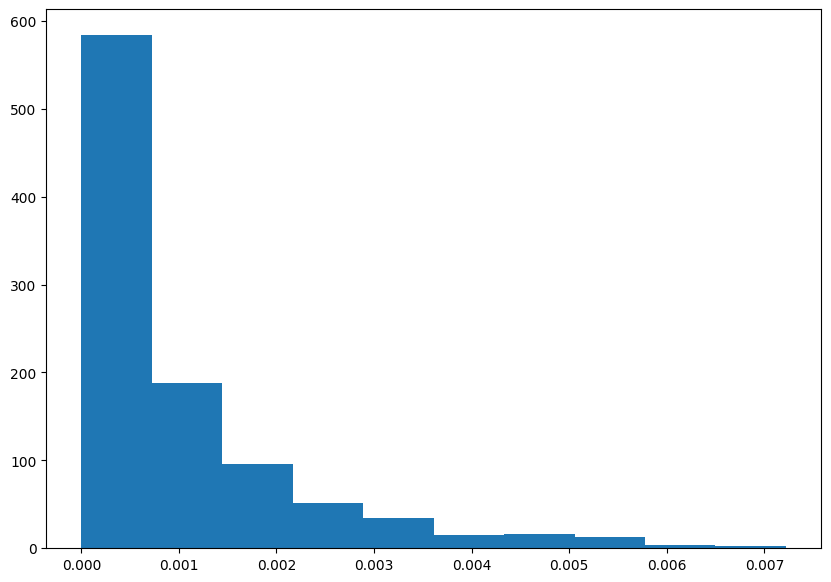

In [74]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(sorted_hub.values())
plt.show()

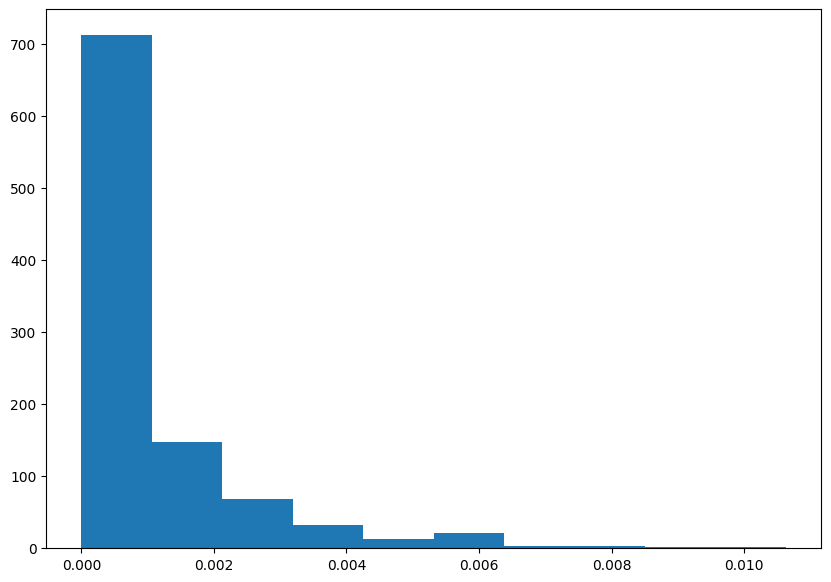

In [75]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(sorted_auth.values())
plt.show()

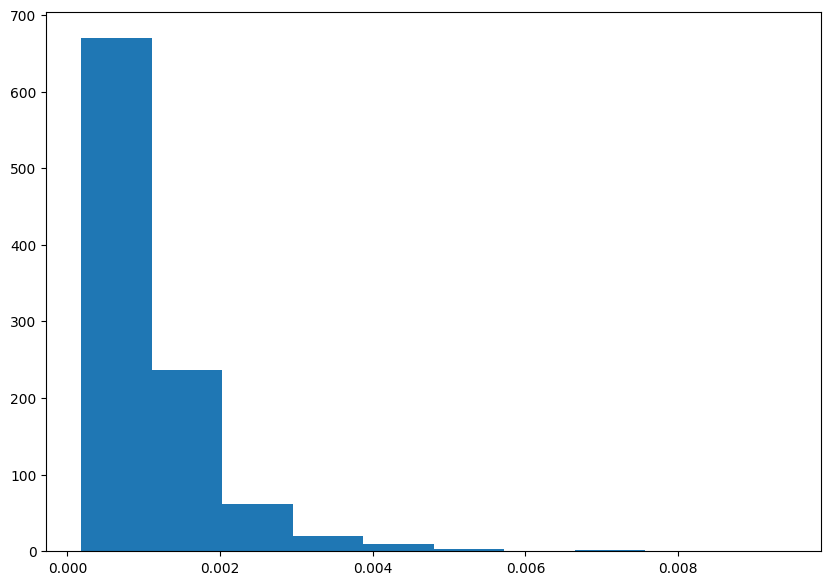

In [76]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(sorted_pr.values())
plt.show()

In [88]:
#in the following graph, wide_variable1 refers to the Hub Score, wide_variable2 Authority and wide_variabl3 refers to  PageRank 
import plotly.express as px
fig = px.scatter(x=sorted_pr.keys(), y=[sorted_hub , sorted_auth , sorted_pr] , title = "Hub , Authority and PageRank Scores' Comparison")
fig.update_layout(
   xaxis_title="Nodes (Pages)",
   yaxis_title="Scores",
   legend_title="legend",
   font=dict(family="Arial", size=20, color="black")
)


fig.show()
fig = px.line(x=sorted_pr.keys(), y=[sorted_hub , sorted_auth , sorted_pr]  , title = "Hub , Authority and PageRank Scores' Comparison")
fig.update_layout(
   xaxis_title="Nodes (Pages)",
   yaxis_title="Scores",
   legend_title="legend",
   font=dict(family="Arial", size=20, color="black")
)
fig.show()

In [92]:
print("Min value in pagerank value:", min(sorted_pr.values()), "Max value in pagerank score:",max(sorted_pr.values()))
print("Min value in hub score:", min(sorted_hub.values()), "Max value in hub score:",max(sorted_hub.values()))
print("Min value in authoriy value:", min(sorted_auth.values()), "Max value in authority score:",max(sorted_auth.values()))

Min value in pagerank value: 0.0001825929340379251 Max value in pagerank score: 0.009411560186382712
Min value in hub score: -3.6182689473209083e-19 Max value in hub score: 0.007220481699191957
Min value in authoriy value: -2.3067162799968476e-21 Max value in authority score: 0.010628802611038445


In [98]:
for key, value in sorted_pr.items():
  if min(sorted_pr.values()) == value:
      print("node as per pagerank is:", key) 

for key, value in sorted_hub.items():
  if min(sorted_hub.values()) == value:
      print("node as per hub is:", key) 

for key, value in sorted_auth.items():
  if min(sorted_auth.values()) == value:
      print("node as per auth is:", key) 

print("Auth score of node 524",sorted_auth[524] )

node as per pagerank is: 524
node as per pagerank is: 750
node as per pagerank is: 755
node as per pagerank is: 790
node as per pagerank is: 858
node as per pagerank is: 863
node as per pagerank is: 875
node as per pagerank is: 879
node as per pagerank is: 901
node as per pagerank is: 941
node as per pagerank is: 943
node as per pagerank is: 944
node as per pagerank is: 982
node as per pagerank is: 995
node as per hub is: 524
node as per auth is: 744
Auth score of node 524 3.133017149750832e-06


In [102]:
for key, value in sorted_pr.items():
  if max(sorted_pr.values()) == value:
      print("node as per pagerank is:", key) 

for key, value in sorted_hub.items():
  if max(sorted_hub.values()) == value:
      print("node as per hub is:", key) 

for key, value in sorted_auth.items():
  if max(sorted_auth.values()) == value:
      print("node as per auth is:", key) 

print("Auth score of node 1",sorted_auth[1] )
print("Hub score of node 1",sorted_hub[1] )


print("Pagerank score of node 160",sorted_pr[160] )


node as per pagerank is: 1
node as per hub is: 160
node as per auth is: 160
Auth score of node 1 2.9004622902639858e-05
Hub score of node 1 0.0017024061489624486
Pagerank score of node 160 0.006758893760759583


In [94]:
#for node 0
print("Page Rank for node 0",sorted_pr[0])
print("Hub for node 0",sorted_hub[0])
print("Auth for node 0",sorted_auth[0])

Page Rank for node 0 0.0012754775504594832
Hub for node 0 0.0008525503876603124
Auth for node 0 0.0011656523581661021


In [95]:
#for node 1
print("Page Rank for node 1:",sorted_pr[1])
print("Hub for node 1:",sorted_hub[1])
print("Auth for node 1:",sorted_auth[1])

Page Rank for node 0 0.009411560186382712
Hub for node 0 0.0017024061489624486
Auth for node 0 2.9004622902639858e-05
